## Linear regresion on data for device id 249
Here I will try to find the function to fit the data and detect anomalies

In [17]:
import math
import pandas as pandas
import numpy as np
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr
from statistics import mean
from numpy.random import shuffle

import matplotlib
# matplotlib.use('Agg')
import matplotlib.pyplot as plt

data_248 = pandas.read_json("../data/device_id_248.json")
data_249 = pandas.read_json("../data/device_id_249.json")

In [18]:
# Already prepared data from Intial data analysis - removed empty rows and wrong dates
data_248

,tot1,tot2,analog2
2018-12-11 12:10:00,116.15,0.00,0.82
2018-12-11 12:11:00,118.02,0.00,0.82
2018-12-11 12:12:00,119.90,0.00,0.82
2018-12-11 12:13:00,121.77,0.00,0.81
2018-12-11 12:14:00,123.64,0.00,0.82
...,...,...,...
2020-04-01 14:05:00,977428.25,-4713.21,1.54
2020-04-01 14:06:00,977428.88,-4713.21,1.54
2020-04-01 14:07:00,977429.50,-4713.21,1.54
2020-04-01 14:08:00,977430.12,-4713.21,1.54


Function generate data for a given timeframe

In [25]:
def draw_given_and_predicted(given, predicted):
    # takes in two arrays - 1. the actual data 2. predicted data
    fig = plt.figure(figsize=(8, 6), dpi= 100, facecolor='w')
    plt.plot(given, color="blue", label="Actual values")
    plt.plot(predicted, color="red", label="Predicted values")
    plt.legend(loc="upper left")
    plt.margins(0, 0.1)
    plt.xticks([])

    plt.ylabel('Pressure in bar')
    plt.xlabel('Cases')
    plt.title('Pressumer through time')
    plt.show()

In [26]:
def generate_day_view(start_date, end_date, data):
    start_day = start_date.strip() + " 00:00"
    end_day = end_date.strip() + " 23:59"
    data = data.loc[(data.index >= start_day) & (data.index <= end_day)]
    
    if len(data.index) < 1:
        raise Exception("No data for this date")
    
    # all values without pressure -> [:,:3], just pressure -> [:,3:]
    # TODO -> convert date to number format and try to find correlation ?
    data.index = pandas.to_datetime(data.index)
    matrix_X = data.reset_index().values

    size_of_learn_set = round(len(matrix_X) * 0.70)
    
    # Dividing data on the test and learn set
    learn_set = matrix_X[:size_of_learn_set]
    test_set  = matrix_X[size_of_learn_set:]
    
    model = LinearRegression()
    model.fit(learn_set[:,1:3], learn_set[:,3:])
    predicted_values = model.predict(test_set[:,1:3])
    
    accuracy = mean_squared_error(test_set[:,3:], predicted_values)
    draw_given_and_predicted(test_set[:,3:], predicted_values)
    
    return accuracy

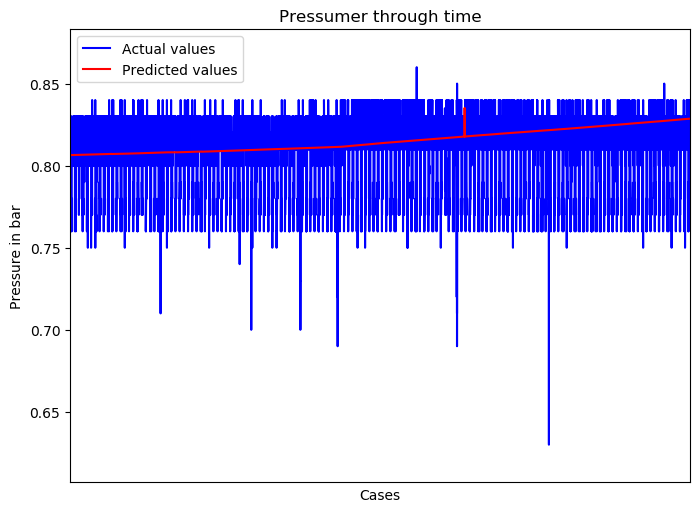

Values predicted on this time interval have an error of 0.0004196895600878155 .


In [28]:
acc = generate_day_view("2018-01-01", "2020-04-01", data_249)
print("Values predicted on this time interval have an error of", acc, ".")

In [24]:
# Napovedana vrednost - aka tuki smo iskali oceno, na zacetku smo dali ocene vseh filmov in uporabnika, 
# pol smo pa dali uporabnika in ocene in je probalo napovedat

"""
Napovedat hocmo pritisk torej je pritisk to, napovedat ga hocmo na podlagi parametru [time, tot1, tot2]
- torej rabim za vsak pritisk matriko X [[time, tot1, tot2], [time, tot1, tot2], [time, tot1, tot2], ......]
- Y bodo pa pritiski [1.5, 1.5, 1.6, ....]
- za predictat pa vzamem spet matriko X -  [[time, tot1, tot2],... ] za en dan... -> vrne mi vrednosti
- to pol comparam z dejanskim pritiskom od takrat in zracunam razliko med napovedanim
""";

NameError: name 'timestamp' is not defined

<Figure size 800x600 with 0 Axes>

In [ ]:

"""learn_set_num = round(len(data_set_1) * 0.70)

learn_set = data_set_1[:learn_set_num]
test_set  = data_set_1[learn_set_num:]
model = LinearRegression()

model.fit([[i[0]] for i in learn_set], [i[1] for i in learn_set])
predicted_values = model.predict([[i[1]] for i in test_set])""";